I. Perkenalan
1. Nama: Muhammad Zukri Al Walidani
2. Batch: 007
3. Phase: 2

Data berikut merupakan kumpulan informasi konsumen dari perusahaan Telco Churn, dimana diperlihatkan layanan yang diberikan oleh perusahaan tersebut seperti telepon rumah, layanan internet dan lain lain. Pada data ini juga diperlihatkan konsumen yang mendaftar dan konsumen yang meninggalkan perusahaan. Penting bagi perusahaan untuk mengetahui faktor apa saja yang mempengaruhi konsumen dalam menggunakan layanan mereka. Analisis ini bertujuan untuk mengembangkan model prediksi untuuk pelanggan yang akan meninggalkan perushaan.

II. Import Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras

III. Data Loading

In [3]:
#input data
df=pd.read_csv('costumer_churn.csv')

In [4]:
#melihat tabel
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
#eksplorasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#melihat missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#menghapus customerID karena terlalu banyak variasi
df.drop(['customerID'], axis = 1, inplace=True)

IV. Exploratory Data Analysis (EDA)

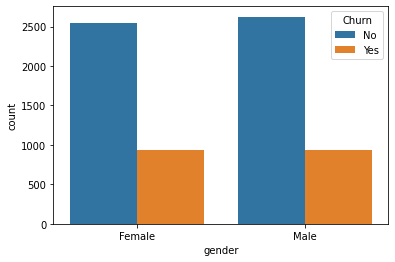

In [8]:
#ploting gender dan churn
sns.countplot(x='gender', hue='Churn', data=df);

Insight:
1. Tidak terlalu terlihat perbedaan Churn konsumen pria dan wanita

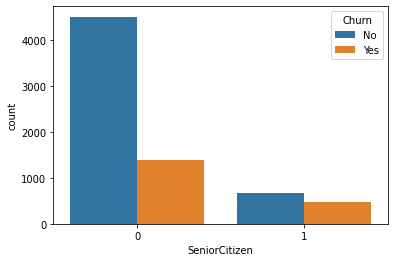

In [9]:
#ploting Seniorcitizen dan churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df);

insight:
1. senior cityzen lebih berpeluang untuk churn

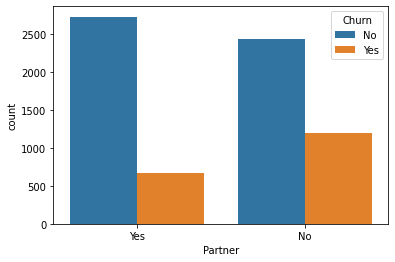

In [10]:
#plotting Partner dan churn
sns.countplot(x='Partner', hue='Churn', data=df);

Insight:
1. Peluang yang bukan parner untuk churn lebih besar

In [11]:
#grouping features
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

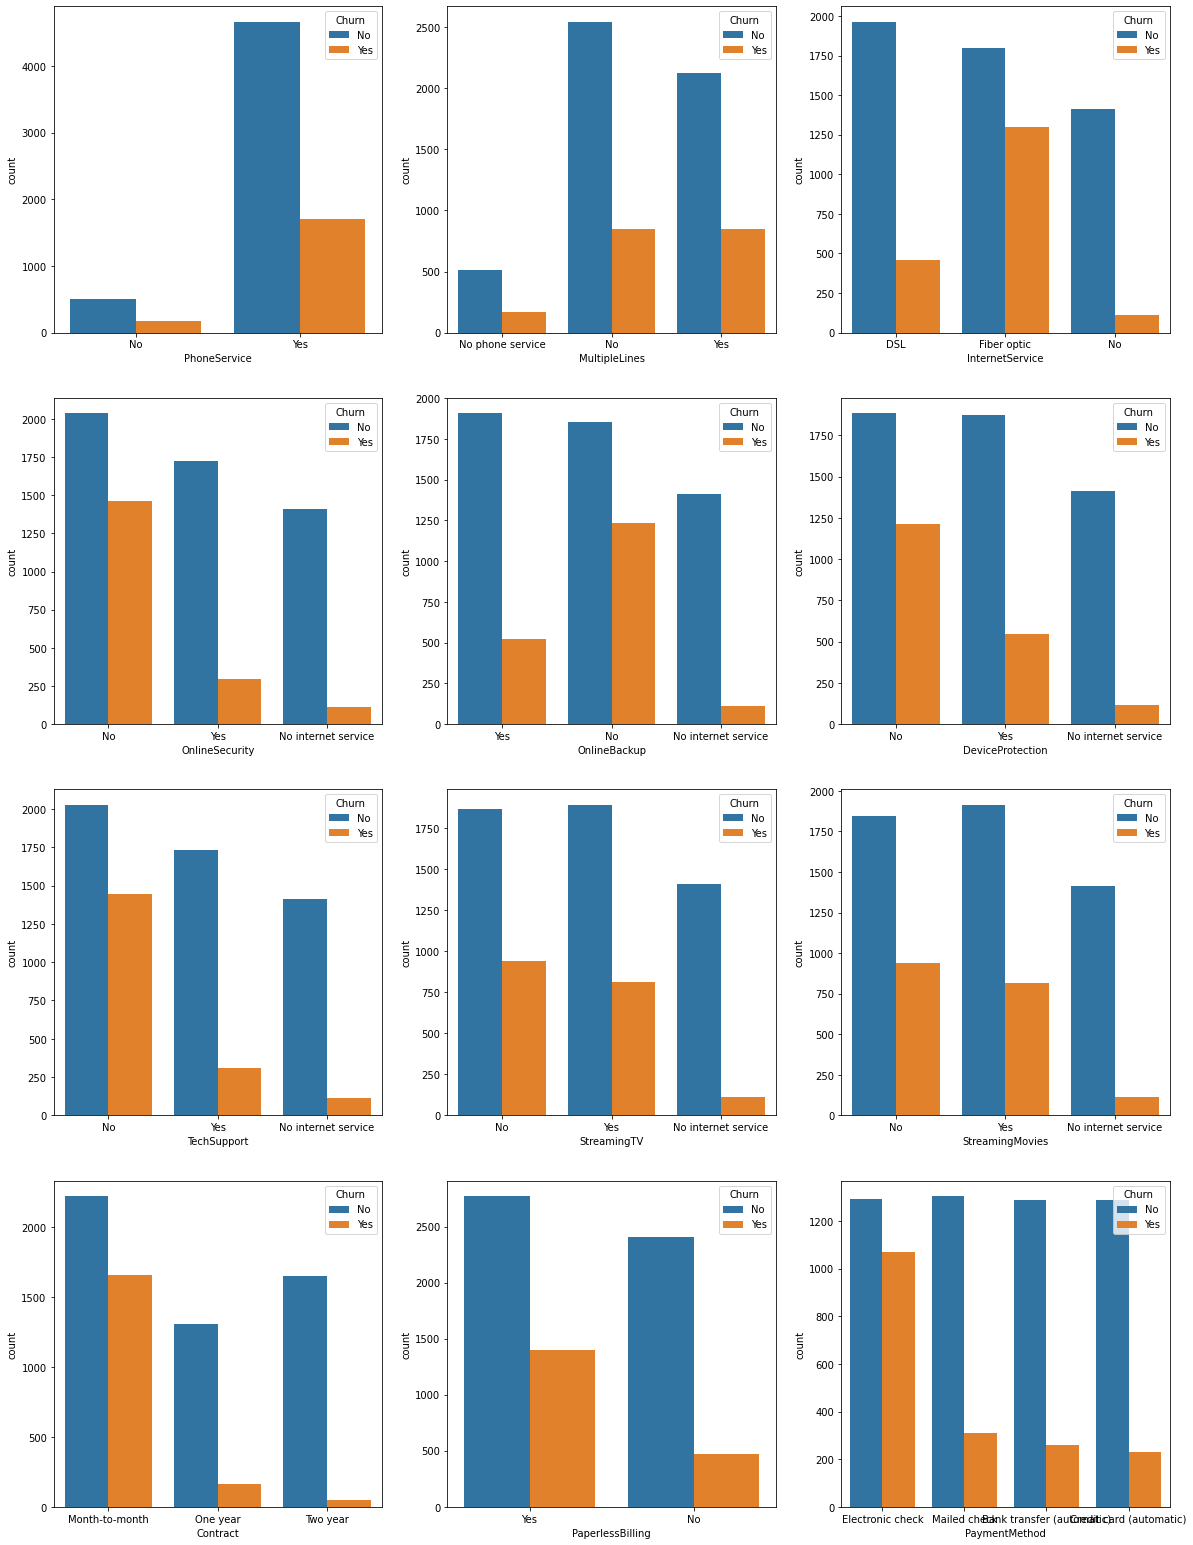

In [12]:
#visuaisasi plot features
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

insight:
1. perbadingan phoneservice tidak terlalu terlihat.
2. yang tidak menggunakan multiplelines mempunyai proporsi yang paling besar.
3. fiber optic mempunyai peluang untuk churn yang paling besar dibandingkan DSL dan no internet service
4. pelanggan yang tidak menggunakan online security mempunyai peluang untuk churn yang paling besar.
5. perbandingan yang menggunakan streaming tv dan tidak, proporsi untuk churn hampir sama
6. pelanggan yang tidak menggunakan device protection berpeluang besar untuk churn
7. pelanggan yang tidak menggunakan techsupport berpeluang besar untuk churn
8. perbandingan yang menggunakan streaminmmovies dan tidak, proporsi untuk churn hampir sama
9. pelanggan perbuan mempunyai peluang untuk churn yang paling tinggi
10. pelanggan dengan paperlessbilling lebih berpeluang churn
11. pelanggan dengan electronik check paling berpeluang untuk churn
12. pelanggan yang tidak menggunakan layanan online backup paling berpeluang untuk churn

V. Data Preprocessing

In [13]:
#mengubah menghapus data dengan nilai ''
df['TotalCharges'].replace(to_replace = ' ', value= np.nan, inplace = True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dropna(axis=0, inplace=True)

In [14]:
#splitting data menjadi 3 bagian data test, train dan validasi
y = df['Churn']
X = df.loc[:, df.columns != 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=30)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=30)

print(X_train.shape, X_test.shape, X_val.shape)

(4218, 19) (1407, 19) (1407, 19)


In [15]:
#mengubah data seniorcitizen mejadi kategori
X_train['SeniorCitizen']=pd.Categorical(X_train['SeniorCitizen'])
X_test['SeniorCitizen']=pd.Categorical(X_test['SeniorCitizen'])
X_val['SeniorCitizen']=pd.Categorical(X_val['SeniorCitizen'])

In [16]:
#mengubah nilai target menjadi numerik
y_train = y_train.map(dict(Yes=1, No=0))
y_test = y_test.map(dict(Yes=1, No=0))
y_val = y_val.map(dict(Yes = 1, No=0))
print(y_train.shape, y_test.shape, y_val.shape)

(4218,) (1407,) (1407,)


In [17]:
# membagi kolom menjadi 3 kategori yaitu standarisasi, label encoding dan one hot encoding
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [18]:
#melakukan scaling
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [19]:
#Melakukan encoding
X_train = pd.DataFrame(X_train)
X_val= pd.DataFrame(X_val)
X_test= pd.DataFrame(X_test)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

for col in cat_cols_le:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

In [20]:
#melihat jumlah masing masinig bagian data
print(X_train.shape, X_test.shape, X_val.shape)

(4218, 19) (1407, 19) (1407, 19)


In [21]:
#memasukkan data yang telah diencoding
ohe.fit(X_train[cat_cols_ohe])
tr_cols= ohe.transform(X_train[cat_cols_ohe])
te_cols = ohe.transform(X_test[cat_cols_ohe])
tc_cols = ohe.transform(X_val[cat_cols_ohe])

X_train.drop(columns=cat_cols_ohe, inplace=True)
X_test.drop(columns=cat_cols_ohe, inplace=True)
X_val.drop(columns=cat_cols_ohe, inplace=True)

X_train = np.hstack((X_train,tr_cols.toarray()))
X_test = np.hstack((X_test,te_cols.toarray()))
X_val = np.hstack((X_val,tc_cols.toarray()))
print(X_train.shape, X_test.shape, X_val.shape)

(4218, 26) (1407, 26) (1407, 26)


In [22]:
#melihat jumlah data
print(y_train.shape, y_test.shape, y_val.shape)

(4218,) (1407,) (1407,)


VI. Model Definition, Trainning and Evaluatiom

In [23]:
#pembuatan pipeline tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_dataset = train_dataset.shuffle(500).batch(30)
test_dataset  = test_dataset.shuffle(500).batch(30)
val_dataset   = val_dataset.shuffle(500).batch(30)

In [24]:
# arsitektur
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(26,))) # hidden layer 1
model.add(Dense(15, activation='relu')) # hidden layer 2
model.add(Dense(10, activation='relu')) # hidden layer 3
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
#menggunakan sigmoid karena data binary classification
#iterasi sebanyak 30 kali
#3 hidden layer

Epoch 1/30
132/132 [==============================] - 1s 4ms/step - loss: 0.5051 - accuracy: 0.7523 - val_loss: 0.4504 - val_accuracy: 0.7903
Epoch 2/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7963 - val_loss: 0.4386 - val_accuracy: 0.7932
Epoch 3/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7971 - val_loss: 0.4342 - val_accuracy: 0.7967
Epoch 4/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8011 - val_loss: 0.4377 - val_accuracy: 0.7925
Epoch 5/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8011 - val_loss: 0.4348 - val_accuracy: 0.7989
Epoch 6/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8030 - val_loss: 0.4316 - val_accuracy: 0.7982
Epoch 7/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8070 - val_loss: 0.4302 - val_accuracy: 0.8017
Epoch 

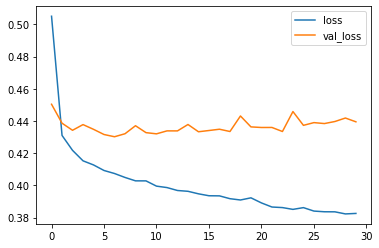

In [25]:
#melihat grafik loss dan val_loss
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

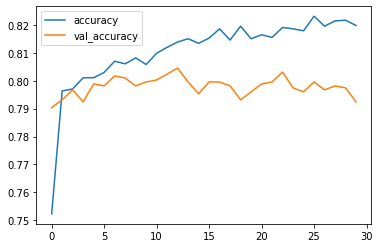

In [26]:
#melihat grafik accuracy dan val_accuracy
metrics[['accuracy', 'val_accuracy']].plot();

terlihat bahwa model mengalami overfitting, terlihat juga bahwa model terlalu powerfull bagi data

In [27]:
# functional API

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

data_in = Input(shape=(26,))
hidden_1 = Dense(10, activation='relu')(data_in)
output_lay = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=data_in, outputs=output_lay)
#menggunakan sigmoid karena data binary classification

In [28]:
#melihat keseluruhan model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense_4 (Dense)             (None, 10)                270       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [29]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
#optimezer yang digunakan adalah adam
#metric yang digunakan accuracy
#loss menggunakan binary_crossentropy karena binary classification

Epoch 1/30
132/132 [==============================] - 1s 4ms/step - loss: 0.5145 - accuracy: 0.7437 - val_loss: 0.4736 - val_accuracy: 0.7591
Epoch 2/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7795 - val_loss: 0.4475 - val_accuracy: 0.7861
Epoch 3/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7859 - val_loss: 0.4419 - val_accuracy: 0.7861
Epoch 4/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7933 - val_loss: 0.4390 - val_accuracy: 0.7925
Epoch 5/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7968 - val_loss: 0.4372 - val_accuracy: 0.7918
Epoch 6/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7961 - val_loss: 0.4354 - val_accuracy: 0.7967
Epoch 7/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8001 - val_loss: 0.4346 - val_accuracy: 0.8003
Epoch 

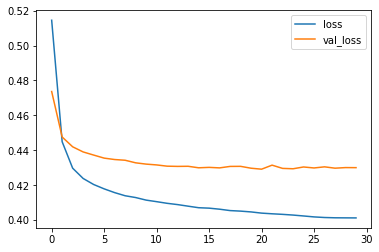

In [30]:
#Melihat grafik loss dan val loss
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

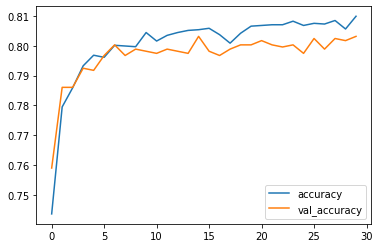

In [31]:
#Melihat grafik accuracy dan val accuracy
metrics[['accuracy', 'val_accuracy']].plot();

model cukup bagus, namun mengalami sedikit overfitting

VII. Model Improvement

In [32]:
#Sequential API
# arsitektur
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(26,))) # hidden layer
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

#layer yang dimasukkan sebanyak 10 layer karena lebih sedikit dari pada feature
#binary classification menggunakan ouput sigmoid dan los binary_crossentropy
#optimizer menggunakan SGD
#metrics menggunakan accuracy,boleh juga menggunakan precision atau f-1 score dan lain lain

In [33]:
# train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
#iterasi sebanyak 30

Epoch 1/30
132/132 [==============================] - 1s 4ms/step - loss: 0.6145 - accuracy: 0.6980 - val_loss: 0.5520 - val_accuracy: 0.7264
Epoch 2/30
132/132 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7307 - val_loss: 0.5049 - val_accuracy: 0.7292
Epoch 3/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7338 - val_loss: 0.4831 - val_accuracy: 0.7321
Epoch 4/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7432 - val_loss: 0.4705 - val_accuracy: 0.7456
Epoch 5/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7570 - val_loss: 0.4624 - val_accuracy: 0.7591
Epoch 6/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7622 - val_loss: 0.4567 - val_accuracy: 0.7690
Epoch 7/30
132/132 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7712 - val_loss: 0.4529 - val_accuracy: 0.7811
Epoch 

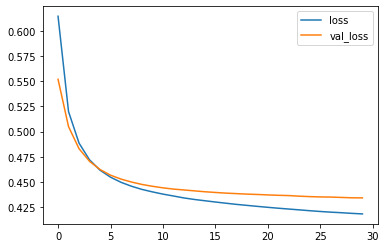

In [34]:
#Melihat grafik loss dan val loss
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

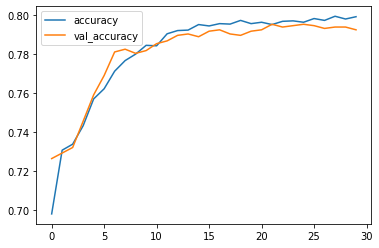

In [36]:
#Melihat grafik accuracy dan val accuracy
metrics[['accuracy', 'val_accuracy']].plot();

Setelah dilakukan pengurangan hidden layer, didapatkan model dengan loss dan val loss yang baik, dan untuk accuracy serta val accuracy sudah bagus

Model analysis berdasarkan 3 model:
1. Model pertama menggunakan sequential API dengan 3 hidden layer dan optimizer adam mengalami overfitting dikarenakan model terlalu powerfull untuk data.
2. Model kedua dengan menggunakan Functional API dengan 1 hidden layer dan optimer SGD model mengalami sedikit overfitting
3. Model ketiga atau model improvement  menggunakan sequential api dilakukan pengurangan dari 3 hidden layer menjadi 1 hidden layer dan optimizer dirubah menjadi SGD, hadilnya model menjadi model yang paling baik dari ke tiga model tersebut 

VIII. Model Inference

In [39]:
trainx = pd.DataFrame(X_train)
valx = pd.DataFrame(X_val)

testing = pd.concat([trainx.sample(100), valx.sample(100)], ignore_index = True)
dummy = testing.sample(2)

model_pred = model.predict(dummy)

model_pred1 = np.where(model_pred >= 0.5, 'yes', 'no')
model_pred1

array([['yes'],
       ['yes']], dtype='<U3')

model telah dapat melakukan prediksi

IX. Pengambilan Kesimpulan

insight:
1. pelanggan yang tidak menggunakan multiplelines, online security, device protection, techsupport, online backup  mempunyai peluang paling besar untuk churn.
2. fiber optic mempunyai peluang untuk churn yang paling besar dibandingkan DSL dan no internet service
3. pelanggan perbulan mempunyai peluang untuk churn yang paling tinggi, hal ini terjadi karena pelanggan perbulan bisa memutuskan layanan setelah habis waktu sebulan, mungkin bisa diberikan opsi baru yaitu 3 bulan atau 4 bulan minimal langganan
4. pelanggan dengan paperlessbilling dan electronik check lebih berpeluang churn hal ini bisa jadi karena tidak adanya interaksi antara customer service dengan pelanggan.
5. terlihat bahwa pelanggan yang melakukan churn pada umumnya tidak menggunakan layanan yang bervariasi dalam Telco company, ada baiknya dilakukan promosi kepada pelanggan agar menggunakan layanan lebih dari satu
6. model yang paling tepat dalam memprediksi model tersebut adalah model sequential api dengan 1 hidden layer dan optimizer SGD, hasilnya model menjadi model yang paling baik dari ke tiga model tersebut 
7. model telah dapat melakukan prediksi